In [1]:
from ngsolve import *
from ngsolve.webgui import Draw
from netgen.geom2d import unit_square

importing NGSolve-6.2.2104


In [ ]:
ngsolve.

In [19]:
def myfun(h):
    mesh = Mesh(unit_square.GenerateMesh(maxh=h))
    V = H1(mesh,order=4,dirichlet='right|top|bottom|left')
    gfu = GridFunction(V)
    u,v = V.TnT()
    
    A = BilinearForm(V)
    A += grad(u) * grad(v)*dx

    Uanalytisch = x*(x-1)*y*(y-1)
    deltaUanalytisch = -2*x*(x-1)-2*y*(y-1)
    f = LinearForm(V)
    f += deltaUanalytisch*v*dx

    A.Assemble()
    f.Assemble()
    
    gfu.vec.data = A.mat.Inverse(inverse='sparsecholesky',freedofs=V.FreeDofs())*f.vec
    return Integrate((gfu-Uanalytisch)**2,mesh,order=5)

In [9]:
hs = [0.25,0.125,0.05,0.01]
err = []
for h in hs:
    err.append(myfun(h))

 Generate Mesh from spline geometry
 Boundary mesh done, np = 16
 CalcLocalH: 16 Points 0 Elements 0 Surface Elements
 Meshing domain 1 / 1
 Surface meshing done
 Edgeswapping, topological
 Smoothing
 Split improve
 Combine improve
 Smoothing
 Edgeswapping, metric
 Smoothing
 Split improve
 Combine improve
 Smoothing
 Edgeswapping, metric
 Smoothing
 Split improve
 Combine improve
 Smoothing
 Update mesh topology
 Update clusters
assemble VOL element 34/34                                 
assemble VOL element 34/34                                 
 Generate Mesh from spline geometry
 Boundary mesh done, np = 32
 CalcLocalH: 32 Points 0 Elements 0 Surface Elements
 Meshing domain 1 / 1
 Surface meshing done
 Edgeswapping, topological
 Smoothing
 Split improve
 Combine improve
 Smoothing
 Edgeswapping, metric
 Smoothing
 Split improve
 Combine improve
 Smoothing
 Edgeswapping, metric
 Smoothing
 Split improve
 Combine improve
 Smoothing
 Update mesh topology
 Update clusters
assemble VOL

In [10]:
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ab3f8fjt because the default path (/home/jupyter-stiw/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


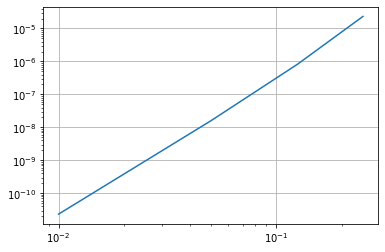

In [12]:
plt.loglog(hs,err)
plt.grid()